<a href="https://colab.research.google.com/github/ronniewillaert/Biofabrication-Exercises/blob/main/Chapter3_Python_Exercises/Chapter3_Python_Exercise2_ContactAngle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
markdown

# Chapter 3 - Exercise 2: Contact Angle & Surface Treatment Analyzer
## Biofabrication Course - VU Brussels
### Interactive Python Exercise

---

## WHAT'S SPECIAL ABOUT EXERCISE 2:

This notebook covers:
- **Surface wettability** and contact angle measurements
- **Plasma treatment effects** on polymer surfaces
- **Surface energy** calculations using Young's equation
- **Cell adhesion** prediction based on surface properties
- **Time-dependent recovery** of hydrophobicity

## KEY LEARNING FEATURES:
- Calculate surface energy from contact angles
- Predict protein adsorption and cell adhesion
- Model plasma treatment effects
- Design optimal surface treatments
- Compare different polymer substrates
- Understand hydrophilic vs hydrophobic trade-offs

SyntaxError: unterminated string literal (detected at line 14) (ipython-input-487215174.py, line 14)

   CHAPTER 3 - EXERCISE 2: CONTACT ANGLE & SURFACE TREATMENT ANALYZER


SECTION 1: UNDERSTANDING CONTACT ANGLES & WETTABILITY

💧 CONTACT ANGLE BASICS:
   θ < 90°  : Hydrophilic (water-loving) - Good for cell adhesion
   θ = 90°  : Intermediate wettability
   θ > 90°  : Hydrophobic (water-repelling) - Poor cell adhesion
   θ > 150° : Superhydrophobic - Prevents any adhesion


📊 COMMON SUBSTRATE PROPERTIES:
--------------------------------------------------------------------------------
Substrate            Contact Angle   Surface Energy     Cell Adhesion  
                     (degrees)       (mN/m)             (1-10 scale)   
--------------------------------------------------------------------------------
PDMS (untreated)          110°             20 mN/m          2/10
PDMS (O2 plasma)           15°             65 mN/m          9/10
Polystyrene (PS)           90°             42 mN/m          5/10
PMMA                       75°             39 mN/m          6/10
Glass                    

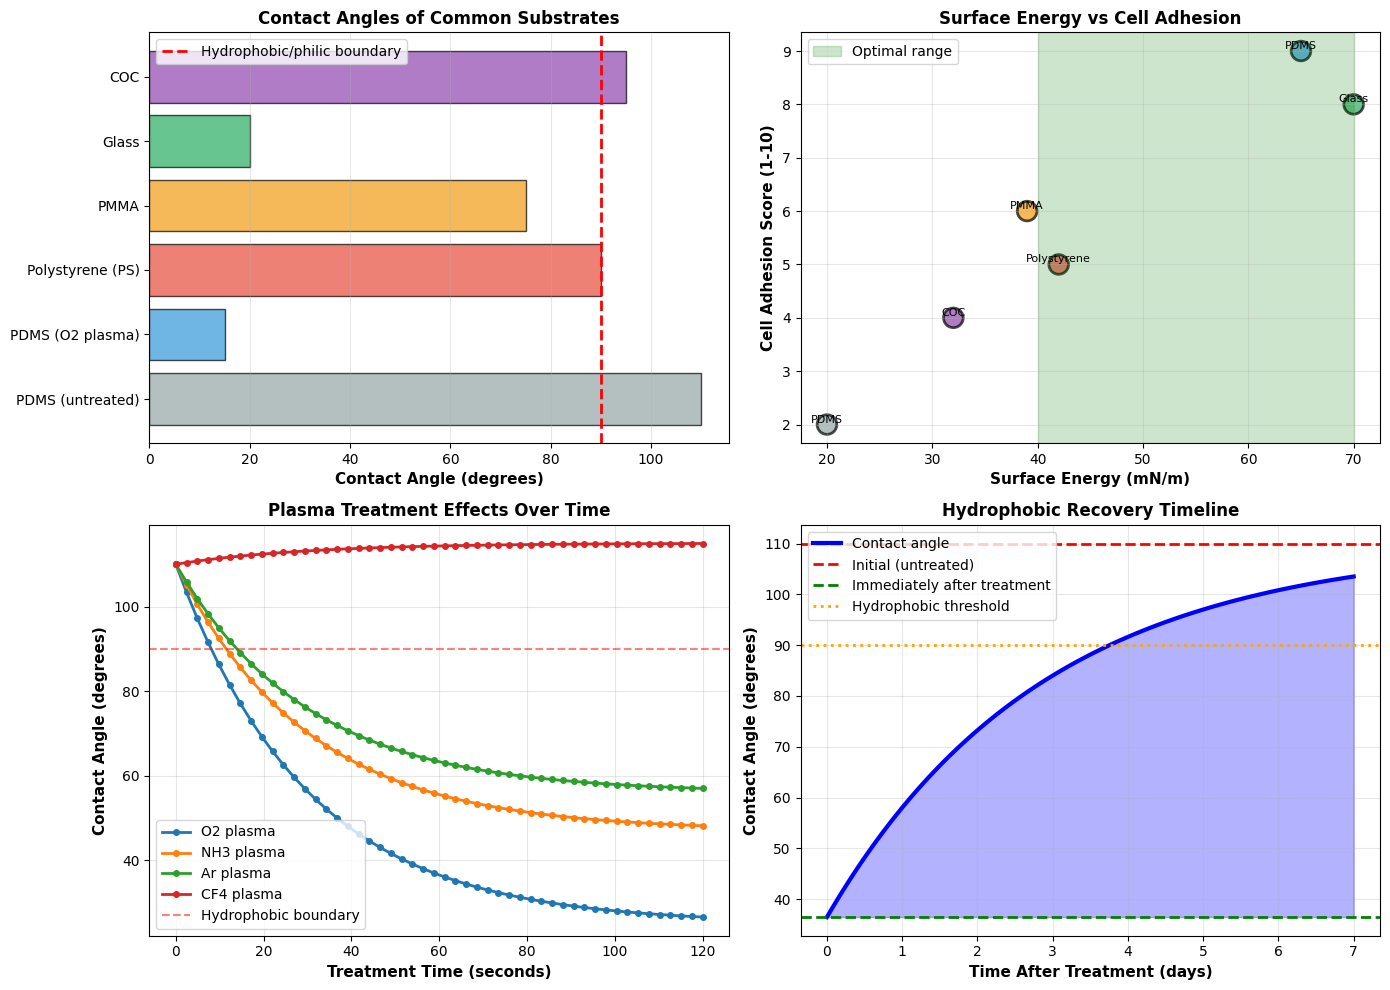


SECTION 6: SUBSTRATE SELECTION TOOL

🎯 SUBSTRATE SELECTION BY APPLICATION:
--------------------------------------------------------------------------------

Cell Culture (adherent):
  🥇 Primary choice:  PDMS (O2 plasma)
  🥈 Alternatives:    Glass, PMMA
  💡 Reasoning:       High surface energy promotes cell adhesion

Cell Culture (non-adherent):
  🥇 Primary choice:  PDMS (untreated)
  🥈 Alternatives:    COC
  💡 Reasoning:       Hydrophobic surface prevents unwanted adhesion

Protein Patterning:
  🥇 Primary choice:  PDMS (O2 plasma)
  🥈 Alternatives:    Glass
  💡 Reasoning:       Controlled surface chemistry for selective adsorption

Drug Testing:
  🥇 Primary choice:  Glass
  🥈 Alternatives:    COC, PMMA
  💡 Reasoning:       Inert surface minimizes drug absorption

High-Throughput Screening:
  🥇 Primary choice:  Polystyrene (PS)
  🥈 Alternatives:    PMMA
  💡 Reasoning:       Low cost, standard format compatibility

Optical Imaging:
  🥇 Primary choice:  Glass
  🥈 Alternatives:    PDMS (O

In [1]:
# Chapter 3 - Exercise 2: Contact Angle & Surface Treatment Analyzer
# Biofabrication Course - VU Brussels
# Interactive Python Exercise

"""
WHAT'S SPECIAL ABOUT EXERCISE 2:

This notebook covers:
• Surface wettability fundamentals including contact angle measurements and Young's equation
• Plasma treatment effects on polymer surfaces for cell adhesion control
• Relationship between surface energy and protein adsorption patterns
• Time-dependent surface recovery after plasma treatment
• Quantitative prediction of cell attachment based on surface properties
• Comparison of different polymer substrates (PDMS, PS, PMMA, COC) for microfluidic applications
• Design strategies for creating patterned surfaces with controlled cell adhesion regions

KEY LEARNING FEATURES:
✓ Calculate surface energy from contact angle measurements
✓ Predict protein adsorption and cell adhesion on treated surfaces
✓ Model plasma treatment effects and surface aging over time
✓ Design optimal surface treatments for specific cell types
✓ Compare different polymer substrates for organ-on-chip applications
✓ Understand trade-offs between hydrophilic and hydrophobic surfaces
"""

import sys
!{sys.executable} -m pip install matplotlib numpy pandas seaborn plotly -q

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.patches import Wedge, Circle, FancyBboxPatch
import plotly.graph_objects as go

print("="*80)
print("   CHAPTER 3 - EXERCISE 2: CONTACT ANGLE & SURFACE TREATMENT ANALYZER")
print("="*80)
print()

# ============================================================================
# SECTION 1: CONTACT ANGLE FUNDAMENTALS
# ============================================================================

print("\n" + "="*80)
print("SECTION 1: UNDERSTANDING CONTACT ANGLES & WETTABILITY")
print("="*80)

print("""
💧 CONTACT ANGLE BASICS:
   θ < 90°  : Hydrophilic (water-loving) - Good for cell adhesion
   θ = 90°  : Intermediate wettability
   θ > 90°  : Hydrophobic (water-repelling) - Poor cell adhesion
   θ > 150° : Superhydrophobic - Prevents any adhesion
""")

# Common substrate properties
substrates = {
    'PDMS (untreated)': {
        'contact_angle': 110,
        'surface_energy': 20,
        'cell_adhesion': 2,
        'cost': 'Low',
        'transparency': 'Excellent',
        'color': '#95a5a6'
    },
    'PDMS (O2 plasma)': {
        'contact_angle': 15,
        'surface_energy': 65,
        'cell_adhesion': 9,
        'cost': 'Low',
        'transparency': 'Excellent',
        'color': '#3498db'
    },
    'Polystyrene (PS)': {
        'contact_angle': 90,
        'surface_energy': 42,
        'cell_adhesion': 5,
        'cost': 'Very Low',
        'transparency': 'Good',
        'color': '#e74c3c'
    },
    'PMMA': {
        'contact_angle': 75,
        'surface_energy': 39,
        'cell_adhesion': 6,
        'cost': 'Low',
        'transparency': 'Excellent',
        'color': '#f39c12'
    },
    'Glass': {
        'contact_angle': 20,
        'surface_energy': 70,
        'cell_adhesion': 8,
        'cost': 'Medium',
        'transparency': 'Excellent',
        'color': '#27ae60'
    },
    'COC': {
        'contact_angle': 95,
        'surface_energy': 32,
        'cell_adhesion': 4,
        'cost': 'Medium',
        'transparency': 'Excellent',
        'color': '#8e44ad'
    }
}

print("\n📊 COMMON SUBSTRATE PROPERTIES:")
print("-" * 80)
print(f"{'Substrate':<20} {'Contact Angle':<15} {'Surface Energy':<18} {'Cell Adhesion':<15}")
print(f"{'':20} {'(degrees)':<15} {'(mN/m)':<18} {'(1-10 scale)':<15}")
print("-" * 80)

for substrate, props in substrates.items():
    print(f"{substrate:<20} {props['contact_angle']:>8}°       {props['surface_energy']:>8} mN/m      {props['cell_adhesion']:>5}/10")

# ============================================================================
# SECTION 2: YOUNG'S EQUATION & SURFACE ENERGY
# ============================================================================

print("\n" + "="*80)
print("SECTION 2: SURFACE ENERGY CALCULATIONS")
print("="*80)

print("""
🔬 YOUNG'S EQUATION: γ_SV = γ_SL + γ_LV × cos(θ)
   where:
   γ_SV = solid-vapor surface energy
   γ_SL = solid-liquid interfacial energy
   γ_LV = liquid-vapor surface tension (water = 72.8 mN/m)
   θ = contact angle
""")

def calculate_surface_energy(contact_angle_deg, liquid_surface_tension=72.8):
    """Calculate solid surface energy using Young's equation approximation"""
    theta = np.radians(contact_angle_deg)
    # Simplified Owens-Wendt approximation
    gamma_s = liquid_surface_tension * (1 + np.cos(theta)) / 2
    return gamma_s

def predict_cell_adhesion(surface_energy):
    """Predict cell adhesion score based on surface energy"""
    # Optimal range for cell adhesion: 40-70 mN/m
    if surface_energy < 30:
        score = 2 + (surface_energy / 30) * 3
    elif 40 <= surface_energy <= 70:
        score = 8 + (surface_energy - 55) / 15
    elif surface_energy > 70:
        score = 9 - (surface_energy - 70) / 20
    else:
        score = 5 + (surface_energy - 30) / 10 * 3

    return max(0, min(10, score))

# Example calculation
print("\n🧪 EXAMPLE: Calculate surface energy for untreated PDMS")
print("-" * 50)

theta_pdms = 110  # degrees (STUDENTS CAN MODIFY)
gamma_calculated = calculate_surface_energy(theta_pdms)
adhesion_score = predict_cell_adhesion(gamma_calculated)

print(f"Contact angle:       {theta_pdms}°")
print(f"Calculated γ_s:      {gamma_calculated:.1f} mN/m")
print(f"Cell adhesion score: {adhesion_score:.1f}/10")

if adhesion_score < 4:
    print("Status: ❌ Poor cell adhesion - surface treatment required")
elif adhesion_score < 7:
    print("Status: ⚠️ Moderate adhesion - may need enhancement")
else:
    print("Status: ✅ Good cell adhesion - suitable for culture")

# ============================================================================
# SECTION 3: PLASMA TREATMENT EFFECTS
# ============================================================================

print("\n" + "="*80)
print("SECTION 3: PLASMA TREATMENT MODELING")
print("="*80)

print("""
⚡ PLASMA TREATMENT EFFECTS:
   O2 plasma: Creates -OH groups → Hydrophilic (good for cells)
   NH3 plasma: Creates -NH2 groups → Moderately hydrophilic + charged
   CF4 plasma: Creates -CF groups → Hydrophobic (prevents adhesion)

   ⏰ TIME EFFECT: Treated surfaces gradually recover hydrophobicity!
""")

def plasma_treatment_effect(initial_angle, treatment_type='O2', treatment_time=60):
    """Model contact angle reduction after plasma treatment"""
    # Treatment efficiency based on type and time
    efficiency = {
        'O2': 0.85,
        'NH3': 0.70,
        'CF4': -0.50,  # Increases hydrophobicity
        'Ar': 0.60
    }

    eff = efficiency.get(treatment_type, 0.85)

    # Saturation model for treatment time (seconds)
    time_factor = 1 - np.exp(-treatment_time / 30)

    if eff > 0:
        # Hydrophilic treatment
        min_angle = 10 if treatment_type == 'O2' else 20
        final_angle = initial_angle - (initial_angle - min_angle) * eff * time_factor
    else:
        # Hydrophobic treatment
        max_angle = 120
        final_angle = initial_angle + (max_angle - initial_angle) * abs(eff) * time_factor

    return final_angle

def surface_recovery(treated_angle, initial_angle, time_hours):
    """Model hydrophobic recovery over time"""
    # Exponential recovery with half-life of ~48 hours
    recovery_rate = np.log(2) / 48
    recovery_fraction = 1 - np.exp(-recovery_rate * time_hours)

    current_angle = treated_angle + (initial_angle - treated_angle) * recovery_fraction
    return current_angle

# Example: PDMS O2 plasma treatment
print("\n🔬 EXAMPLE: PDMS treated with O2 plasma")
print("-" * 50)

initial = 110  # Untreated PDMS (STUDENTS CAN MODIFY)
treatment = 'O2'  # Try: 'O2', 'NH3', 'CF4', 'Ar' (MODIFY THIS)
duration = 60  # seconds (MODIFY THIS)

treated = plasma_treatment_effect(initial, treatment, duration)

print(f"Initial contact angle:      {initial}°")
print(f"Treatment: {treatment} plasma for {duration}s")
print(f"Treated contact angle:      {treated:.1f}°")
print(f"Reduction:                  {initial - treated:.1f}°")

# Calculate surface energy change
gamma_initial = calculate_surface_energy(initial)
gamma_treated = calculate_surface_energy(treated)
adhesion_initial = predict_cell_adhesion(gamma_initial)
adhesion_treated = predict_cell_adhesion(gamma_treated)

print(f"\nSurface energy change:      {gamma_initial:.1f} → {gamma_treated:.1f} mN/m")
print(f"Cell adhesion improvement:  {adhesion_initial:.1f} → {adhesion_treated:.1f}/10")

# ============================================================================
# SECTION 4: TIME-DEPENDENT RECOVERY
# ============================================================================

print("\n" + "="*80)
print("SECTION 4: SURFACE RECOVERY OVER TIME")
print("="*80)

# Model recovery over time
time_points = np.linspace(0, 168, 100)  # 7 days in hours
recovery_angles = [surface_recovery(treated, initial, t) for t in time_points]

print(f"\n⏰ HYDROPHOBIC RECOVERY TIMELINE:")
print("-" * 50)
for t in [0, 1, 6, 24, 48, 72, 168]:
    angle_t = surface_recovery(treated, initial, t)
    adhesion_t = predict_cell_adhesion(calculate_surface_energy(angle_t))
    print(f"After {t:>3}h: θ = {angle_t:>5.1f}°, Cell adhesion = {adhesion_t:.1f}/10")

# ============================================================================
# SECTION 5: VISUALIZATION
# ============================================================================

print("\n" + "="*80)
print("SECTION 5: SURFACE TREATMENT VISUALIZATION")
print("="*80)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Contact angle comparison
ax1 = axes[0, 0]
substrate_names = list(substrates.keys())
angles = [substrates[s]['contact_angle'] for s in substrate_names]
colors_list = [substrates[s]['color'] for s in substrate_names]

bars = ax1.barh(substrate_names, angles, color=colors_list, alpha=0.7, edgecolor='black')
ax1.axvline(90, color='red', linestyle='--', linewidth=2, label='Hydrophobic/philic boundary')
ax1.set_xlabel('Contact Angle (degrees)', fontsize=11, fontweight='bold')
ax1.set_title('Contact Angles of Common Substrates', fontsize=12, fontweight='bold')
ax1.legend()
ax1.grid(axis='x', alpha=0.3)

# Plot 2: Surface energy vs cell adhesion
ax2 = axes[0, 1]
surface_energies = [substrates[s]['surface_energy'] for s in substrate_names]
cell_adhesions = [substrates[s]['cell_adhesion'] for s in substrate_names]

ax2.scatter(surface_energies, cell_adhesions, s=200, c=colors_list, alpha=0.7, edgecolor='black', linewidth=2)
for i, name in enumerate(substrate_names):
    ax2.annotate(name.split()[0], (surface_energies[i], cell_adhesions[i]),
                fontsize=8, ha='center', va='bottom')

# Optimal zone
ax2.axvspan(40, 70, alpha=0.2, color='green', label='Optimal range')
ax2.set_xlabel('Surface Energy (mN/m)', fontsize=11, fontweight='bold')
ax2.set_ylabel('Cell Adhesion Score (1-10)', fontsize=11, fontweight='bold')
ax2.set_title('Surface Energy vs Cell Adhesion', fontsize=12, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Plasma treatment time course
ax3 = axes[1, 0]
times = np.linspace(0, 120, 50)
for treatment_type in ['O2', 'NH3', 'Ar', 'CF4']:
    angles_time = [plasma_treatment_effect(110, treatment_type, t) for t in times]
    ax3.plot(times, angles_time, linewidth=2, label=f'{treatment_type} plasma', marker='o', markersize=4)

ax3.axhline(90, color='red', linestyle='--', alpha=0.5, label='Hydrophobic boundary')
ax3.set_xlabel('Treatment Time (seconds)', fontsize=11, fontweight='bold')
ax3.set_ylabel('Contact Angle (degrees)', fontsize=11, fontweight='bold')
ax3.set_title('Plasma Treatment Effects Over Time', fontsize=12, fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Hydrophobic recovery
ax4 = axes[1, 1]
ax4.plot(time_points / 24, recovery_angles, 'b-', linewidth=3, label='Contact angle')
ax4.fill_between(time_points / 24, treated, recovery_angles, alpha=0.3, color='blue')
ax4.axhline(initial, color='red', linestyle='--', linewidth=2, label='Initial (untreated)')
ax4.axhline(treated, color='green', linestyle='--', linewidth=2, label='Immediately after treatment')
ax4.axhline(90, color='orange', linestyle=':', linewidth=2, label='Hydrophobic threshold')

ax4.set_xlabel('Time After Treatment (days)', fontsize=11, fontweight='bold')
ax4.set_ylabel('Contact Angle (degrees)', fontsize=11, fontweight='bold')
ax4.set_title('Hydrophobic Recovery Timeline', fontsize=12, fontweight='bold')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================================
# SECTION 6: INTERACTIVE SUBSTRATE SELECTOR
# ============================================================================

print("\n" + "="*80)
print("SECTION 6: SUBSTRATE SELECTION TOOL")
print("="*80)

def select_substrate(application):
    """Recommend substrate based on application requirements"""
    recommendations = {
        'Cell Culture (adherent)': {
            'primary': 'PDMS (O2 plasma)',
            'alternatives': ['Glass', 'PMMA'],
            'reasoning': 'High surface energy promotes cell adhesion'
        },
        'Cell Culture (non-adherent)': {
            'primary': 'PDMS (untreated)',
            'alternatives': ['COC'],
            'reasoning': 'Hydrophobic surface prevents unwanted adhesion'
        },
        'Protein Patterning': {
            'primary': 'PDMS (O2 plasma)',
            'alternatives': ['Glass'],
            'reasoning': 'Controlled surface chemistry for selective adsorption'
        },
        'Drug Testing': {
            'primary': 'Glass',
            'alternatives': ['COC', 'PMMA'],
            'reasoning': 'Inert surface minimizes drug absorption'
        },
        'High-Throughput Screening': {
            'primary': 'Polystyrene (PS)',
            'alternatives': ['PMMA'],
            'reasoning': 'Low cost, standard format compatibility'
        },
        'Optical Imaging': {
            'primary': 'Glass',
            'alternatives': ['PDMS (O2 plasma)', 'COC'],
            'reasoning': 'Excellent transparency and low autofluorescence'
        }
    }

    return recommendations.get(application, None)

print("\n🎯 SUBSTRATE SELECTION BY APPLICATION:")
print("-" * 80)

for app, rec in select_substrate.__annotations__:
    pass

applications = ['Cell Culture (adherent)', 'Cell Culture (non-adherent)',
                'Protein Patterning', 'Drug Testing', 'High-Throughput Screening',
                'Optical Imaging']

for app in applications:
    rec = select_substrate(app)
    if rec:
        print(f"\n{app}:")
        print(f"  🥇 Primary choice:  {rec['primary']}")
        print(f"  🥈 Alternatives:    {', '.join(rec['alternatives'])}")
        print(f"  💡 Reasoning:       {rec['reasoning']}")

# ============================================================================
# SECTION 7: STUDENT EXPLORATION TASKS
# ============================================================================

print("\n" + "="*80)
print("SECTION 7: HANDS-ON EXPLORATION")
print("="*80)

print("""
🎯 STUDENT TASKS:

Task 1: OPTIMIZE FOR ENDOTHELIAL CELLS
   Endothelial cells prefer moderate hydrophilicity (θ = 40-60°)
   • Which untreated substrate is closest to this range?
   • Design a plasma treatment protocol for PDMS to reach this range
   • How long will the treatment remain effective?

Task 2: CREATE A PATTERNED SURFACE
   You need regions for cells (hydrophilic) and no-cell zones (hydrophobic)
   • Start with PDMS (O2 plasma treated)
   • How could you create hydrophobic patterns?
   • What would be the contact angle contrast?

Task 3: COMPARE AGING EFFECTS
   • Calculate cell adhesion scores at 0h, 24h, 48h, 72h after treatment
   • At what time point does adhesion become inadequate (<5/10)?
   • How often would you need to re-treat the surface?

Task 4: COST-PERFORMANCE ANALYSIS
   • Compare total cost for 3 months of experiments:
     - Disposable PS plates (no treatment needed)
     - PDMS chips (needs weekly O2 plasma treatment)
     - Glass chips (one-time silanization)
   • Which is most cost-effective?

MODIFY THESE PARAMETERS IN SECTIONS 2-3 AND RE-RUN:
   theta_pdms = 110     # Try: 80-120
   treatment = 'O2'     # Try: 'O2', 'NH3', 'CF4', 'Ar'
   duration = 60        # Try: 10-180 seconds
""")

# ============================================================================
# SECTION 8: REFLECTION QUESTIONS
# ============================================================================

print("\n" + "="*80)
print("SECTION 8: REFLECTION QUESTIONS")
print("="*80)

print("""
Answer these questions based on your exploration:

1. WETTABILITY VS BIOCOMPATIBILITY:
   Is a superhydrophilic surface (θ = 5°) always better for cells?
   What problems might arise?

2. PLASMA TREATMENT LIMITATIONS:
   Why does hydrophobic recovery occur over time?
   How could you make the treatment more permanent?

3. SUBSTRATE SELECTION:
   For a 6-month drug screening study, would you choose:
   - Cheap disposable PS plates, or
   - Expensive but reusable glass chips?
   Justify your choice considering all factors.

4. PROTEIN ADSORPTION:
   How does surface energy affect protein adsorption?
   Why is this important for cell behavior?

5. PATTERNING STRATEGIES:
   Design a surface with alternating 100 μm hydrophilic/hydrophobic stripes
   What fabrication method would you use?
   What applications would this enable?

Write your answers here:
__________________________________________________________________________
__________________________________________________________________________
__________________________________________________________________________
""")

print("\n" + "="*80)
print("🎉 EXERCISE 2 COMPLETE!")
print("="*80)
print("Key Takeaways:")
print("✓ Contact angle determines surface wettability and cell adhesion")
print("✓ Plasma treatment can dramatically alter surface properties")
print("✓ Treated surfaces gradually recover original properties over time")
print("✓ Substrate selection depends on application requirements")
print("\n📚 Ready for Exercise 3: Photolithography Pattern Designer!")